<a href="https://colab.research.google.com/github/thamonS/bcs_dpdm24/blob/main/Chapter_2_Understanding_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
file_path = '/content/drive/MyDrive/bsc_dpdm24_data/export62_64.xlsx'

In [15]:
excel_file_path = '/content/drive/MyDrive/data/export62_64.xlsx'
df_excel = pd.read_excel(excel_file_path, sheet_name="Export 64", skiprows=2, usecols=(1,2,3,4))
df_excel.head()

,ปีแม่แบบ,เดือนแม่แบบ,พิกัดศุลกากร 8 หลัก,รหัสสถิติ
0,2564,1,1012100,0
1,2564,1,1012900,0
2,2564,1,1022100,1
3,2564,1,1022919,0
4,2564,1,1023100,0


#Google Sheets

In [ ]:
# prompt: open google sheets

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

# Open the Google Sheet by name
sh = gc.open("Your Spreadsheet Name") # Replace with your sheet's name

# Select a worksheet
worksheet = sh.sheet1 # Or sh.worksheet("Sheet2") if you have named worksheets


# Example: Get all values from the worksheet
all_values = worksheet.get_all_values()
print(all_values)

#Example: Read data into a Pandas DataFrame
worksheet = sh.sheet1
rows = worksheet.get_all_values()
df_gsheet = pd.DataFrame.from_records(rows[1:], columns=rows[0]) #Header row is first row
df_gsheet

##ของอ.

In [17]:
# ของอ.

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

spreadsheet_key = '1V06HuBuxR_jbeLxv2D3P3aEPZFq1rM9Y35iSAVsODSs'
sh = gc.open_by_key(spreadsheet_key)

worksheet_name = 'Export 62'
worksheet = sh.worksheet(worksheet_name)

data = worksheet.get_all_values()
df_sheet = pd.DataFrame(data[1:], columns=data[0])
df_sheet.head()

,ปีแม่แบบ,เดือนแม่แบบ,พิกัดศุลกากร 8 หลัก,รหัสสถิติ,หน่วยตามรหัสสถิติ,คำอธิบายไทย,คำอธิบาย,น้ำหนัก/ปริมาณสถิติ,มูลค่าส่งออกเงินบาท
0,2562,1,01012900,000,C62,อื่น ๆ,Other,7,105000
1,2562,1,01022100,001,C62,โคตัวผู้,Bullocks,6663,119934000
2,2562,1,01022100,002,C62,โคตัวเมีย,Cows,36,2223000
3,2562,1,01022919,000,C62,อื่น ๆ,Other,16983,362443500
4,2562,1,01023100,000,C62,สำหรับทำพันธุ์,Pure-bred breeding animals,746,13055000


#JSON

In [21]:
# prompt: load JSON file name data_station from drive

import json

drive.mount('/content/drive')

# Specify the path to your JSON file
file_path = '/content/drive/MyDrive/data/data_station.json'  # Replace with your actual file path

try:
    with open(file_path, 'r') as file:
        data = json.load(file)
        # Now you can work with the 'data' variable, which contains the JSON data
        # For example, convert to a pandas DataFrame if it's a list of dictionaries
        if isinstance(data, list) and all(isinstance(item, dict) for item in data):
          df = pd.DataFrame(data)
          print(df.head())  # Print the first few rows of the DataFrame
        else:
          print("JSON data is not a list of dictionaries.")
          print(data)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
except json.JSONDecodeError:
    print(f"Error: Invalid JSON format in {file_path}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   id  station_code           name            en_name th_short en_short  \
0   1          1001        กรุงเทพ            Bangkok      กท.      BKK   
1   2          1002          ยมราช           Yommaraj      ยช.      YMR   
2   3          1004         สามเสน            Sam Sen      สส.      SAM   
3   4          1006     ประดิพัทธ์          Pra Dipat     ปอิ.      PDP   
4   5          1007  ชุมทางบางซื่อ  Bang Sue Junction      บซ.      BSJ   

  chname controldivision exact_km exact_distance km class        lat  \
0     曼谷              14        0              0  0    11  13.739277   
1    勇马拉              14        2              2  2    99          0   
2     三森              14        5              4  4     1  13.779293   
3    帕涤潘              14        6              6  6    99          0   
4   邦苏总站              14        7              7  7     1   

In [24]:
json_file_path = '/content/drive/MyDrive/data/data_station.json'

df_json = pd.read_json(json_file_path)
df_json.head()

,id,station_code,name,en_name,th_short,en_short,chname,controldivision,exact_km,exact_distance,km,class,lat,long,active,giveway,dual_track,comment
0,1,1001,กรุงเทพ,Bangkok,กท.,BKK,曼谷,14,0,0,0,11,13.739277,100.517391,1,1,1,NULL
1,2,1002,ยมราช,Yommaraj,ยช.,YMR,勇马拉,14,2,2,2,99,0,0.000000,1,1,1,NULL
2,3,1004,สามเสน,Sam Sen,สส.,SAM,三森,14,5,4,4,1,13.779293,100.529235,1,1,1,NULL
3,4,1006,ประดิพัทธ์,Pra Dipat,ปอิ.,PDP,帕涤潘,14,6,6,6,99,0,0.000000,1,1,1,ป.สระอิ
4,5,1007,ชุมทางบางซื่อ,Bang Sue Junction,บซ.,BSJ,邦苏总站,14,7,7,7,1,13.8043,100.540050,1,1,1,NULL


In [25]:
json_file_path = '/content/drive/MyDrive/data/memo_2298.json'
df_json = pd.read_json(json_file_path)
df_json.head()

,MemoId,DocumentNo,TemplateId,TemplateName,ToPerson,CcPerson,CreatorId,CNameTh,CNameEn,CPositionId,...,Amount,RequestDate,ModifiedDate,PersonWaitingId,PersonWaiting,CompanyId,CompanyName,CompletedDate,Form,ActionHistory
0,2298,REQ-2019-002298,1050,แบบฟอร์มเบิกเงินสดย่อย,Mr. Suwittawat Ragsameorwong,Miss Soravee Ritgarunvong,8,นางสาวเพิ่มสิน คุณวิสิฏสิริ,Miss Phoemsin Kunwisitsiri,16,...,300,2019-03-21T08:43:47.490Z,2019-03-22T12:03:23.447Z,NaN,นายสุวิทวัท รักเสมอวงศ์,2,TCB : TechCons Biz,NaN,"{'type': 'l', 'label': 'ใบเบิกเงินสดย่อย', 'va...","{'ActionId': 1458, 'MemoId': 2298, 'ActorId': ..."
1,2298,REQ-2019-002298,1050,แบบฟอร์มเบิกเงินสดย่อย,Mr. Suwittawat Ragsameorwong,Miss Soravee Ritgarunvong,8,นางสาวเพิ่มสิน คุณวิสิฏสิริ,Miss Phoemsin Kunwisitsiri,16,...,300,2019-03-21T08:43:47.490Z,2019-03-22T12:03:23.447Z,NaN,นายสุวิทวัท รักเสมอวงศ์,2,TCB : TechCons Biz,NaN,"{'type': 'tb', 'label': '', 'value': {'columns...","{'ActionId': 1526, 'MemoId': 2298, 'ActorId': ..."


In [26]:
f = open('/content/drive/MyDrive/data/memo_2298.json')
json_2298 = json.load(f)
f.close()

In [27]:
json_2298

{'MemoId': 2298,
 'DocumentNo': 'REQ-2019-002298',
 'TemplateId': 1050,
 'TemplateName': 'แบบฟอร์มเบิกเงินสดย่อย',
 'ToPerson': 'Mr. Suwittawat Ragsameorwong',
 'CcPerson': 'Miss Soravee Ritgarunvong',
 'CreatorId': 8,
 'CNameTh': 'นางสาวเพิ่มสิน คุณวิสิฏสิริ',
 'CNameEn': 'Miss Phoemsin Kunwisitsiri',
 'CPositionId': 16,
 'CPositionTh': 'ผู้จัดการฝ่ายขาย',
 'CPositionEn': 'Account Manager',
 'CDepartmentId': 4,
 'CDepartmentTh': 'Management',
 'CDepartmentEn': 'Management',
 'CDivisionId': None,
 'CDivisionTh': None,
 'CDivisionEn': None,
 'RequesterId': 8,
 'RNameTh': 'นางสาวเพิ่มสิน คุณวิสิฏสิริ',
 'RNameEn': 'Miss Phoemsin Kunwisitsiri',
 'RPositionId': 16,
 'RPositionTh': 'ผู้จัดการฝ่ายขาย',
 'RPositionEn': 'Account Manager',
 'RDepartmentId': 4,
 'RDepartmentTh': 'Management',
 'RDepartmentEn': 'Management',
 'RDivisionId': None,
 'RDivisionTh': None,
 'RDivisionEn': None,
 'MemoSubject': 'เบิกเงินสดย่อย',
 'StatusName': 'Rejected',
 'Amount': 300,
 'RequestDate': '2019-03-21T08:

In [28]:
#ดึง status name ออกมา (เมื่อมันเป็นลิส)
json_2298['StatusName']

'Rejected'

#QUIZ 3

In [29]:
# prompt: get 'ActorName' และ 'ActionProcess' ของ 'ActionHistory' อันแรก จากjson_2298

# Access the first element of 'ActionHistory'
first_action_history = json_2298['ActionHistory'][0]

# Extract 'ActorName' and 'ActionProcess'
actor_name = first_action_history['ActorName']
action_process = first_action_history['ActionProcess']

# Print the results
print(f"ActorName: {actor_name}")
print(f"ActionProcess: {action_process}")

ActorName: นางสาวเพิ่มสิน คุณวิสิฏสิริ
ActionProcess: submit


#Distance

In [31]:
# prompt: build pd dataform from [1,2],[-1,4],[0,3],[-3,-2] column 1 name X1 column 2 name X2

import pandas as pd

data = {'X1': [1, -1, 0, -3], 'X2': [2, 4, 3, -2]}
df = pd.DataFrame(data)
df

,X1,X2
0,1,2
1,-1,4
2,0,3
3,-3,-2


In [48]:
data = [[1,2],[-1,4],[0,3],[-3,-2]]
df = pd.DataFrame(data, columns=['X1','X2'])
df

,X1,X2
0,1,2
1,-1,4
2,0,3
3,-3,-2


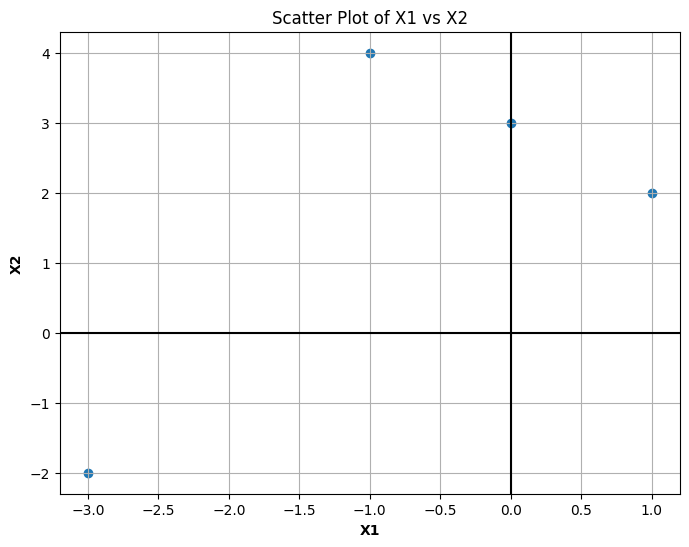

In [49]:
# prompt: draw scatter plot of the df, darw bold line forX1 and X2 axes

import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.scatter(df['X1'], df['X2'])

# Customize the plot
plt.xlabel('X1', fontweight='bold')  # Set X-axis label with bold font
plt.ylabel('X2', fontweight='bold')  # Set Y-axis label with bold font
plt.title('Scatter Plot of X1 vs X2')  # Set the title

# Add bold lines for X1 and X2 axes
plt.axhline(0, color='black', linewidth=1.5, linestyle='-')  # Horizontal line at y=0
plt.axvline(0, color='black', linewidth=1.5, linestyle='-')  # Vertical line at x=0


plt.grid(True)  # Add a grid for better readability
plt.show()

>ใช้ระยะห่างระหว่างจุดเพื่อดูความเหมือนความต่าง (ใกล้เหมือน ไกลต่าง)

In [50]:
# prompt: calculate distance matrix of the df

from scipy.spatial.distance import pdist, squareform

# Assuming 'df' is your DataFrame with numerical columns for which you want to calculate the distance matrix

# Calculate the pairwise distances using Euclidean distance (you can change the metric if needed)
distances = pdist(df, metric='euclidean')

# Convert the condensed distance matrix to a square distance matrix
distance_matrix = squareform(distances)

# Convert the distance matrix to a DataFrame for better readability (optional)
distance_df = pd.DataFrame(distance_matrix, index=df.index, columns=df.index)

distance_df

,0,1,2,3
0,0.000000,2.828427,1.414214,5.656854
1,2.828427,0.000000,1.414214,6.324555
2,1.414214,1.414214,0.000000,5.830952
3,5.656854,6.324555,5.830952,0.000000


>สเกลสำคัญมากตอนที่จะดูระยะห่าง (distance)

>

In [51]:
# prompt: calculate distance matrix of the df use L1-norm

# Calculate the pairwise distances using L1-norm (Manhattan distance)
distances = pdist(df, metric='cityblock')  # 'cityblock' is equivalent to L1-norm

# Convert the condensed distance matrix to a square distance matrix
distance_matrix = squareform(distances)

# Convert the distance matrix to a DataFrame for better readability (optional)
distance_df_l1 = pd.DataFrame(distance_matrix, index=df.index, columns=df.index)

distance_df_l1

,0,1,2,3
0,0.0,4.0,2.0,8.0
1,4.0,0.0,2.0,8.0
2,2.0,2.0,0.0,8.0
3,8.0,8.0,8.0,0.0


In [52]:
data = [[1,200],[-2,400],[0,300],[-3,-200]]
df2 = pd.DataFrame(data, columns=['X1','X2'])
df2

,X1,X2
0,1,200
1,-2,400
2,0,300
3,-3,-200


##Z-score

In [53]:
# prompt: calculate Z-score for df2

from scipy.stats import zscore

# Calculate Z-scores for all columns in df2
df2_zscore = df2.apply(zscore)

df2_zscore

,X1,X2
0,1.264911,0.109764
1,-0.632456,0.987878
2,0.632456,0.548821
3,-1.264911,-1.646464


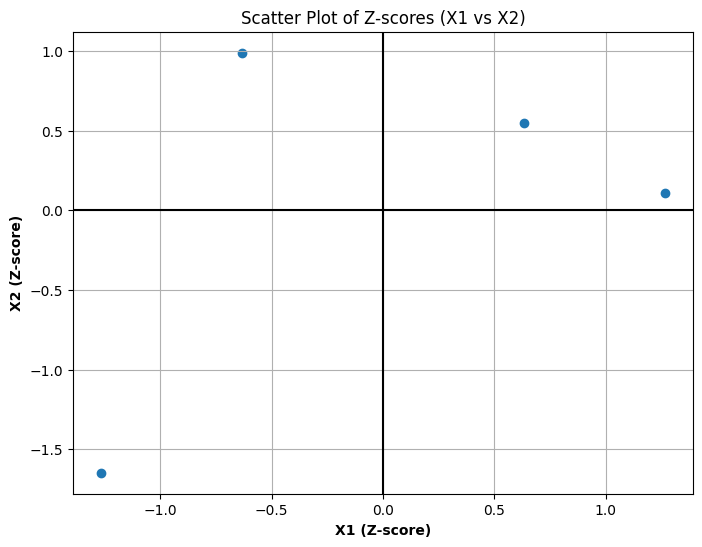

In [55]:
# prompt: scatter plot of df2_zscore

import matplotlib.pyplot as plt

# Assuming df2_zscore is already calculated as in your provided code

# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df2_zscore['X1'], df2_zscore['X2'])

# Customize the plot
plt.xlabel('X1 (Z-score)', fontweight='bold')
plt.ylabel('X2 (Z-score)', fontweight='bold')
plt.title('Scatter Plot of Z-scores (X1 vs X2)')

# Add bold lines for X1 and X2 axes
plt.axhline(0, color='black', linewidth=1.5, linestyle='-')
plt.axvline(0, color='black', linewidth=1.5, linestyle='-')

plt.grid(True)
plt.show()

##Normalization (Z-score & Min-Max normalization)

In [56]:
# prompt: do min max normalizaton for the df2

# Min-Max normalization for df2
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
df2_normalized = pd.DataFrame(scaler.fit_transform(df2), columns=['X1', 'X2'])

df2_normalized

,X1,X2
0,1.00,0.666667
1,0.25,1.000000
2,0.75,0.833333
3,0.00,0.000000
